# Лекция 8. Введение в итерационные методы

## На прошлой лекции...
- Разреженные матрицы и форматы их хранения
- Прямые методы решения больших разреженных линейных систем
- Вектор Фидлера и сепаратор графа

## План на сегодня

Концепция **итерационных методов** для линейных систем:
- Метод Ричардсона и его сходимость
- Метод Чебышёва и его сходимость 

## Итерационные методы

- Если мы хотим достичь сложности $\mathcal{O}(N)$ в решении разреженных линейных систем, то прямые методы нам не подходят.

- Если нам нужно решить частичную задачу на собственные значения, то полное спектральное разложение оказывается слишком дорогой операцией.

- Для обеих задач мы будем использовать итерационные методы, основанные на Крыловских подпространствах, которые рассматривают матрицу как **линейный оператор** для преобразования одного вектора в другой ("чёрный ящик"), а не как двумерный массив с числами.

## Матрица как "чёрный ящик"

- Сейчас рассмотрим альтернативный взгляд на то, что такое матрица: далее матрица – это линейный оператор, который действует на вектор, и результат этого действия можно вычислить за $\mathcal{O}(N)$ операций.

- **Единственная информация, которая нам доступна:** мы знаем о матрице только то, как умножать её на вектор!

- Можно ли решить линейную систему, используя только процедуру умножения матрицы на вектор?

- Конечно, мы можем умножить матрицу на столбцы единичной матрицы и восстановить матрицу, но это не то, что нам нужно.

## Метод Ричардсона (a.k.a метод простой итерации)

Простейшая идея приводит нас к **методу Ричардсона**.

$$Ax = f,$$
$$\tau  (Ax - f) = 0,$$
$$x - \tau (Ax - f) = x,$$
$$x_{k+1} = x_k - \tau (Ax_k - f),$$
   
где $\tau > 0$ параметр метода, который надо выбрать так, чтобы метод сходился.

## Связь с обыкновенными дифференциальными уравнениями (ОДУ)

- Метод Ричардсона имеет глубокую связь с ОДУ.

- Рассмотрим задачу, зависящую от времени ($A=A^*>0$)

$$\frac{dy}{dt} + A y = f, \quad y(0) = y_0.$$

Тогда $y(t) \rightarrow A^{-1} f$ при $t \rightarrow \infty$, и **схема Эйлера** выглядит следующим образом

$$\frac{y_{k+1} - y_k}{\tau} = -A y_k + f,$$

что также приводит к методу Ричардсона

$$ y_{k+1} = y_k - \tau(Ay_k -f). $$

## Сходимость метода Ричардсона

- Пусть $x_*$ решение, введём вектор ошибки $e_k = x_{k} - x_*$, тогда  

$$ e_{k+1} = (I - \tau A) e_k, $$

поэтому если $\Vert I - \tau A \Vert < 1$ в некоторой норме, метод сходится. 

- Для случая симметричной положительно определённой матрицы всегда можно выбрать $\tau$ так, чтобы метод сошёлся.

- Поведение метода для несимметричной матрицы будет рассмотрено далее

## Выбор оптимального параметра

- Параметр $\tau$, который минимизирует $\|I - \tau A\|_2$ для $A = A^* > 0$, выражается следующим образом (получите это выражение!)

$$ \tau_\mathrm{opt} = \frac{2}{\lambda_{\min} + \lambda_{\max}}, $$

где $\lambda_{\min}$ – минимальное собственное значение, а $\lambda_{\max}$ – максимальное собственное значение матрицы $A$.

- Итак, чтобы найти оптимальный параметр нам нужно знать **границы спектра** матрицы $A$, и мы можем вычислить их с помощью **степенного метода**.

## Число обусловленности и скорость сходимости

- Даже с оптимальным выбором значения параметра $\tau$, ошибка на следующей итерации связана с ошибкой на текущей итерации следующим образом

$$\|e_{k+1}\|_2 \leq q \|e_k\|_2 , \quad\rightarrow \quad \|e_k\|_2 \leq q^{k} \|e_0\|_2,$$

где 

$$ q = \frac{\lambda_{\max} - \lambda_{\min}}{\lambda_{\max} + \lambda_{\min}} = \frac{\mathrm{cond}(A) - 1}{\mathrm{cond}(A)+1}, $$

$$\mathrm{cond}(A) = \frac{\lambda_{\max}}{\lambda_{\min}} \quad \text{для} \quad A=A^*>0$$

число обусловенности матрицы $A$.

- Далее покажем на примере сходимость метода Ричардсона...

Maximum eigenvalue = 3.6825070656623624, minimum eigenvalue = 0.08101405277100471
Condition number = 45.45516413147952


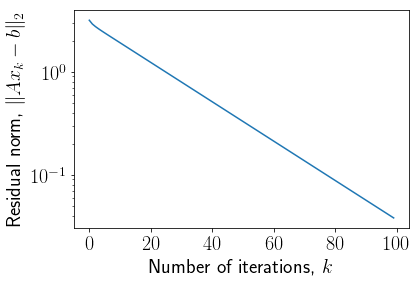

In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("text", usetex=True)
import scipy as sp
import scipy.sparse
import scipy.sparse.linalg as spla
import scipy
from scipy.sparse import csc_matrix
n = 10
ex = np.ones(n);
A = sp.sparse.spdiags(np.vstack((-ex,  2*ex, -ex)), [-1, 0, 1], n, n, 'csr'); 
rhs = np.ones(n)
ev1, vec = spla.eigsh(A, k=2, which='LA')
ev2, vec = spla.eigsh(A, k=2, which='SA')
lam_max = ev1[0]
lam_min = ev2[0]

tau_opt = 2.0/(lam_max + lam_min)

fig, ax = plt.subplots()
plt.close(fig)

niters = 100
x = np.zeros(n)
res_richardson = []
for i in range(niters):
    rr = A.dot(x) - rhs
    x = x - tau_opt * rr
    res_richardson.append(np.linalg.norm(rr))
#Convergence of an ordinary Richardson (with optimal parameter)
plt.plot(res_richardson)
plt.yscale("log")
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("Residual norm, $\|Ax_k - b\|_2$", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
print("Maximum eigenvalue = {}, minimum eigenvalue = {}".format(lam_max, lam_min))
print("Condition number = {}".format(lam_max.real / lam_min.real))

### Вывод о влиянии числа обусловленности на сходимость

- Для **плохо обусловленных** матриц норма вектора ошибки в методе Ричардсона убывает **очень** медленно.
- Это ещё одна причина, по которой число обусловленности очень важно: кроме того, что оно показывает ошибку при решении, оно также даёт оценку числа итераций для сходимости итерационных методов.
- Основной вопрос в разработке итерационных методов – как улучшить обусловленность матрицы?
- Ответом является использование <font color='red'> предобуславливателей (preconditioners) </font>. Эта тема будет рассмотрена далее в курсе.

### Рассмотрим несимметричную матрицу $A$

Возможные варианты поведения метода Ричардсона:
- сходимость
- расходимость
- почти стабильная траектория, то есть отсутствие сходимости, но и отсутствие существенного увеличения нормы вектора ошибки

###### Как мы можем определить поведение метода Ричардсона для несимметричной матрицы **до** запуска метода?

In [38]:
# B = np.random.randn(2, 2)
B = np.array([[1, 2], [-1, 0]])
# B = np.array([[0, 1], [-1, 0]])
print(B)
x_true = np.zeros(2)
f = B.dot(x_true)
eigvals = np.linalg.eigvals(B)
print("Spectrum of the matrix = {}".format(eigvals))

# Run Richardson iteration
x = np.array([0, -1])
tau = 1e-2
conv_x = [x]
r = B.dot(x) - f
conv_r = [np.linalg.norm(r)]
num_iter = 1000
for i in range(num_iter):
    x = x - tau * r
    conv_x.append(x)
    r = B.dot(x) - f
    conv_r.append(np.linalg.norm(r))

[[ 1  2]
 [-1  0]]
Spectrum of the matrix = [0.5+1.32287566j 0.5-1.32287566j]


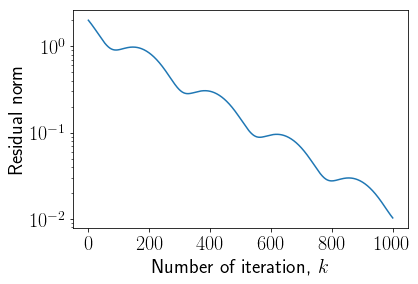

In [57]:
plt.plot(conv_r)
plt.yscale("log")
plt.xlabel("Number of iteration, $k$", fontsize=20)
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=20)
_ = plt.xticks(fontsize=20)

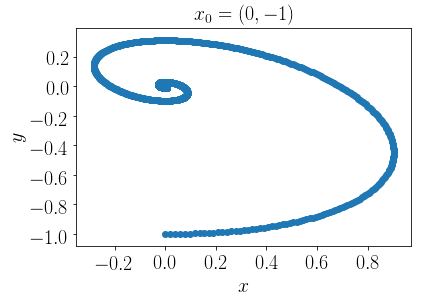

In [59]:
plt.scatter([x[0] for x in conv_x], [x[1] for x in conv_x])
plt.xlabel("$x$", fontsize=20)
plt.ylabel("$y$", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
_ = plt.title("$x_0 = (0, -1)$", fontsize=20)

## Возможные улучшения метода простой итерации

- Наискорейший спуск
- Метод Чебышёва

## Улучшение 1: метод наискорейшего спуска

- Пусть мы можем изменять значения $\tau$ на каждой итерации, то есть 

$$ x_{k+1} = x_k - \tau_k (A x_k - f). $$

- Возможный выбор $\tau_k$ такой что, $\tau_k$ минимизирует нормы текущего вектора остатков, то есть

$$\tau_k = \arg\min_{\tau > 0} \|A(x_k - \tau (A x_k - f)) - f \|^2_2 $$

- Используя технику, аналогичную той, что использовалась для получения нормального уравнения, получим выражение для $\tau_k$

$$\tau_k = \frac{r_k^{\top}r_k}{r_k^{\top}Ar_k}, \quad r_k = Ax_k - f$$

- Такой метод называется **методом наискорейшего спуска**.

- Однако он сходится так же, как и метод Ричардсона.

## Улучшение 2: метод Чебышёва

- Другой метод нахождения $\tau_k$ заключается в рассмотрении следующего выражения

$$e_{k+1} = (I - \tau_k A) e_k = (I - \tau_k A) (I - \tau_{k-1} A)  e_{k-1} = \ldots = p(A) e_0, $$

где $p(A)$ – **матричный полином** (простейшая матричная функция)  

$$ p(A) = (I - \tau_k A) \ldots (I - \tau_0 A), $$

и $p(0) = 1$.

## Оптимальный выбор шагов по времени

- Вектор ошибки можно записать в виде

$$e_{k+1} = p(A) e_0, $$

тогда 

$$\|e_{k+1}\| \leq \|p(A)\| \|e_0\|, $$

где $p(0) = 1$ и $p(A)$ – **матричный полином**. 

- Для получения скорейшего уменьшения нормы вектора ошибки, нам нужно минимизировать

$$\Vert p(A) \Vert$$ 

по всем возможным полиномам $p(x)$ степени $k+1$, таких что $p(0)=1$. 
- Мы будем использовать спектральную норму $\|\cdot\|_2$.

##  Полиномы, наименее отклоняющиеся от 0

- Важный частный случай: $A = A^* > 0$.

- Тогда $A = U \Lambda U^*$, 

и 

$$\Vert p(A) \Vert_2 = \Vert U p(\Lambda) U^* \Vert_2 = \Vert p(\Lambda) \Vert_2 = \max_i |p(\lambda_i)| \overset{!}{\leq}
\max_{\lambda_\min \leq \lambda {\leq} \lambda_\max} |p(\lambda)|.$$

- Последнее неравенство является приближением: мы делаем <font color='red'> ключевое предположение </font> о не использовании распределения спектра между $\lambda_\min$ и $\lambda_\max$ для получения более быстрой сходимости.

- Таким образом, нам нужно найти такой полином заданной степени, что $p(0) = 1$ и отклонение от 0 является минимальным на отрезке $[\lambda_\min, \lambda_\max]$.

##  Масштабирование задачи с $[\lambda_\min, \lambda_\max]$ на $[-1, 1]$

- Мы можем сделать аффинное преобразование отрезка $[\lambda_\min, \lambda_\max]$ в отрезок $[-1, 1]$:

$$ \xi = \frac{{\lambda_\max + \lambda_\min - (\lambda_\min-\lambda_\max)x}}{2}, \quad x\in [-1, 1]. $$

- Теперь задача свелась к задаче поиска полинома, наименее отклоняющегося от 0 на отрезке $[-1, 1]$

## Точное решение: полиномы Чебышёва

- Точным решением этой задачи являются знаменитые **полиномы Чебышёва**, которые можно записать в виде

$$T_n(x) =  \cos (n \arccos x), \quad x \in [-1, 1]$$

## Что вам нужно знать о полиномах Чебышёва

1. Это полиномы!

2. Можно выразить $T_n$ из $T_{n-1}$ и $T_{n-2}$: 

$$T_n(x) = 2x T_{n-1}(x) - T_{n-2}(x), \quad T_0(x)=1, \quad T_1(x)=x$$

3. $|T_n(x)| \leq 1$ на $x \in [-1, 1]$.

4. У них есть $n+1$ **точка альтернанса**, где максимальное абсолютное значение достигается (это необходимое и достаточное условие для **оптимальности**: об этом говорит теорема Чебышёва об альтернансе).

5. Корни записываются как 

$$n \arccos x_k = \frac{\pi}{2} + \pi k, \quad \rightarrow\quad x_k = \cos \frac{\pi(2k + 1)}{2n}, \; k = 0, \ldots,n-1$$

Мы можем их нарисовать!

Text(0.5, 1.0, 'Interval $x\\in[-1.1, 1.1]$')

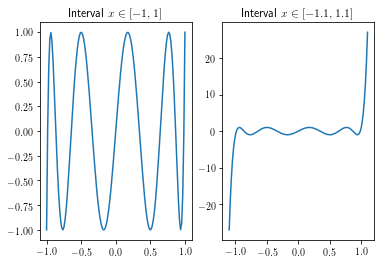

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x1 = np.linspace(-1, 1, 128)
x2 = np.linspace(-1.1, 1.1, 128)
p = np.polynomial.Chebyshev((0, 0, 0, 0, 0, 0, 0, 0, 0, 1), (-1, 1)) #These are Chebyshev series, a proto of "chebfun system" in MATLAB
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x1, p(x1))
ax1.set_title('Interval $x\in[-1, 1]$')
ax2.plot(x2, p(x2))
ax2.set_title('Interval $x\in[-1.1, 1.1]$')

## Сходимость метода Чебышёва

- Заметим, что $p(x) = (1-\tau_n x)\dots (1-\tau_0 x)$, поэтому корни $p(x)$ задаются как $1/\tau_i$ и нам осталось дополнительно отобразить их из $[-1,1]$ в $[\lambda_\min, \lambda_\max]$.

- Это даёт следующий результат

$$\tau_i = \frac{2}{\lambda_\max + \lambda_\min - (\lambda_\max - \lambda_\min)x_i}, \quad x_i = \cos \frac{\pi(2i + 1)}{2n}\quad i=0,\dots,n-1$$

- Сходимость теперь будет такой (без доказательства)

$$ e_{k+1} \leq C q^k e_0, \quad q = \frac{\sqrt{\mathrm{cond}(A)}-1}{\sqrt{\mathrm{cond}(A)}+1}, $$

что лучше, чем у метода Ричардсона.

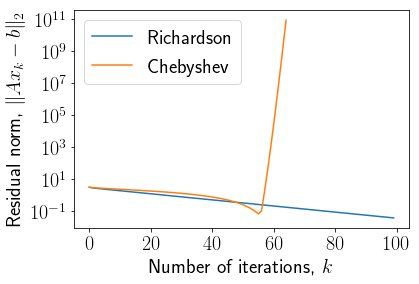

In [47]:
niters = 64
roots = [np.cos((np.pi * (2 * i + 1)) / (2 * niters)) for i in range(niters)]
taus = [(lam_max + lam_min - (lam_min - lam_max) * r) / 2 for r in roots]
x = np.zeros(n)
r = A.dot(x) - rhs
res_cheb = [np.linalg.norm(r)]

# Implementation may be non-optimal if number of iterations is not power of two
def good_shuffle(idx):
    if len(idx) == 1:
        return idx
    else:
        new_len = int(np.ceil((len(idx) / 2)))
        new_idx = good_shuffle(idx[:new_len])
        res_perm = []
        perm_count = 0
        for i in new_idx:
            res_perm.append(i)
            perm_count += 1
            if perm_count == len(idx):
                break
            res_perm.append(len(idx) + 1 - i)
            perm_count += 1
            if perm_count == len(idx):
                break
        return res_perm

good_perm = [i for i in range(1, niters+1)]
# good_perm = good_shuffle([i for i in range(1, niters+1)])
# good_perm = [i for i in range(niters, 0, -1)]
# good_perm = np.random.permutation([i for i in range(1, niters+1)])

for i in range(niters):
    x = x - 1.0/taus[good_perm[i] - 1] * r
    r = A.dot(x) - rhs
    res_cheb.append(np.linalg.norm(r))
    
plt.semilogy(res_richardson, label="Richardson")
plt.semilogy(res_cheb, label="Chebyshev")
plt.legend(fontsize=20)
plt.xlabel("Number of iterations, $k$", fontsize=20)
plt.ylabel("Residual norm, $\|Ax_k - b\|_2$", fontsize=20)
plt.xticks(fontsize=20)
_ = plt.yticks(fontsize=20)

### Что сломалось в прекрасном методе Чебышёва?

- Перестановки корней полинома Чебышёва очень сильно влияют на сходимость метода (почему?)
- Об оптимальной перестановке можно прочитать в [этой статье](http://www.mathnet.ru/links/42ab1a270ad179d43359ef8fab53422c/zvmmf6870.pdf)

### Проект [Chebfun](http://www.chebfun.org/) 

- Проект с открытым исходным кодом для численных расчётов (с интерфейсом для [Python](https://github.com/chebpy/chebpy) и [Matlab](https://github.com/chebfun/chebfun))
- Основан на алгоритмах, работающих с кусочно-полиномиальными интерполяциями и Чебышёвскими полиномами
- Авторами проекта являются Nick Trefethen и его студент Zachary Battles, подробности см. в [этой статье](http://www.chebfun.org/publications/chebfun_paper.pdf)
- Chebfun нацелен на решение следующих задач
    - Аппроксимация
    - Квадратуры
    - ОДУ
    - Уравнения с частными производными
    - Поиск корней
    - Одномерная глобальная оптимизация

## Улучшения метода Чебышёва

- Мы сделали важное предположение о спектре: он содержится на отрезке (и нам нужны границы)

- Если спектр содержится в **двух отрезках** и мы знаем границы, также можно поставить задачу оптимизации для поиска оптимального полинома

## Если спектр матрицы лежит в нескольких отрезках

- Для случая двух отрезков оптимальными полиномами являются **[полиномы Золотарёва](https://www.encyclopediaofmath.org/index.php/Zolotarev_polynomials)** (выражаются через эллиптические функции). 
- Оригинальная работа опубликована в 1877, подробности см. [тут](http://gpntb.dlibrary.org/ru/nodes/4245-zolotarev-e-prilozhenie-ellipticheskih-funktsiy-k-voprosam-o-funktsiyah-naimenee-i-naibolee-otklonyayuschihsya-ot-nulya-spb-1877) 
- Для случая, когда интервалов больше двух, оптимальный полином может быть записан с помощью гиперэллиптических функций

## Как ещё можно ускорить метод Чебышёва?

- Реализация метода Чебышёва требует знания границ спектра.

- Метод хранит вектор $x_k$ и вычисляет новую поправку

$$r_k = A x_k - f.$$

- Оказывается, что если мы будем использовать больше векторов (не только $x_k$ и $r_k$), то мы можем избавиться от необходимости знать спектр и получим более быструю сходимость!

## Главная идея: Крыловские пространства

- Метод Чебышёва даёт аппроксимацию вида

$$x_{k+1} = x_0 + p(A) r_0,$$

то есть $x_{k+1}$ лежит в Крыловском пространстве.
- Крыловское пространство определяется для матрицы $A$ следующим образом

$$ \mathcal{K}_k(A, r_0) = \mathrm{Span}(r_0, Ar_0, A^2 r_0, \ldots, A^{k-1}r_0 ) $$

- Наиболее естественный подход теперь – это искать вектор в этом пространстве, который минимизирует норму некоторого вектора

## Идея Крыловских методов

Идея заключается в минимизации заданного функционала:
- Энергетическая норма вектора ошибки для систем с эрмитовой положительно определённой матрицей (метод сопряжённых градиентов).
- Норма вектора остатков для систем с матрицами общего вида (методы minres и GMRES).
- Отношение Релея для частичных задач на собстенные значения (метод Ланцоша).

Для того чтобы сделать метод практичным нужно следующее
1. Ортогонализовать векторы $A^i r_0$ Крыловского подпространства для устойчивости (процесс Ланцоша).
2. Получить рекуррентные формулы для уменьшения сложности.

Эти методы рассмотрим в следующей лекции.

## Выводы по лекции

- Основная идея итерационных методов
- Метод Ричардсона: эрмитов и неэрмитов случай
- Метод Чебышёва
- Определение Крыловских подпространств